# IART Project - Supervised Learning

### [Sample Telco Customer Churn Dataset](https://www.kaggle.com/datasets/easonlai/sample-telco-customer-churn-dataset)

 Developed by:  
 Carlos Gomes – up201906622​  
 Domingos Santos – up201906680​  
 Filipe Pinto – up201907747  

 

## Table of contents

1. [Introduction](#Introduction)

2. [Specification](#Specification)

3. [Required libraries](#Required-libraries)

4. [Data Pre-Processing](#Data-Pre-Processing)

5. [Data Visualization](#Data-Visualization)

## Introduction
[[ go back to the top ]](#Table-of-contents)    

The main goal of this supervised learning problem is to learn how to classify examples in terms of the concept under
analysis using different learning algorithms. Then they should be compared using appropriate evaluation
metrics and according to the respective time spent to train/test the models. For this particular example we will study/implement the previous for [this](https://www.kaggle.com/datasets/easonlai/sample-telco-customer-churn-dataset) dataset

## Specification
[[ go back to the top ]](#Table-of-contents)  

It is important for a company to retain customers in order to maintain or even increase profit, so it might be very useful to predict their behaviour.​

So, given a dataset with information about telco customers we want to predict if a customer will churn or not​

In other words we want to, the main goal of this project is to predict if a customer will stop buying products/services in telco.​

## Required libraries

[[ go back to the top ]](#Table-of-contents)

If you don't have Python on your computer, you can use the [Anaconda Python distribution](http://continuum.io/downloads) to install most of the Python packages you need. Anaconda provides a simple double-click installer for your convenience.

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
#TODO
#from sklearn.[x] import [y]

In [83]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [57]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

## Data Pre-Processing

[[ go back to the top ]](#Table-of-contents)  

There are to datasets available let's call the main one (with 7011 entries) and the other test (21 entries).
Before any attempt of method implementation we need to do some data analysis and pre-processing.
We first need to load the data. Then we may print some information about the dataset to get used to the way the information is organized and to know what our next step should be, such as statistics and possible missing and repeated values. The following topics indicate the description of each column in the dataset.

Column Description:
- customerID: A unique ID that identifies each customer.
- gender: The customer’s gender: Male (1), Female (0).
- SeniorCitizen: Indicates if the customer is 65 or older: No (0), Yes (1).
- Partner: Service contract is resold by the partner: No (0), Yes (1).
- Dependents: Indicates if the customer lives with any dependents: No (0), Yes (1).
- Tenure: Indicates the total amount of months that the customer has been with the company.
- PhoneService: Indicates if the customer subscribes to home phone service with the company: No (0), Yes (1).
- MultipleLines: Indicates if the customer subscribes to multiple telephone lines with the company: No (0), Yes (1).
- InternetService: Indicates if the customer subscribes to Internet service with the company: No (0), DSL (1), Fiber optic (2).
- OnlineSecurity: Indicates if the customer subscribes to an additional online security service provided by the company: No (0), Yes (1), NA (2).
- OnlineBackup: Indicates if the customer subscribes to an additional online backup service provided by the company: No (0), Yes (1), NA (2).
- DeviceProtection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: No (0), Yes (1), NA (2).
- TechSupport: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: No (0), Yes (1), NA (2).
- StreamingTV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: No (0), Yes (1), NA (2). The company does not charge an additional fee for this service.
- StreamingMovies: Indicates if the customer uses their Internet service to stream movies from a third party provider: No (0), Yes (1), NA (2). The company does not charge an additional fee for this service.
- Contract: Indicates the customer’s current contract type: Month-to-Month (0), One Year (1), Two Year (2).
- PaperlessBilling: Indicates if the customer has chosen paperless billing: No (0), Yes (1).
- PaymentMethod: Indicates how the customer pays their bill: Bank transfer - automatic (0), Credit card - automatic (1), Electronic cheque (2), Mailed cheque (3).
- MonthlyCharges: Indicates the customer’s current total monthly charge for all their services from the company.
- TotalCharges: Indicates the customer’s total charges.
- Churn: Indicates if the customer churn or not: No (0), Yes (1).



In [67]:
# Loading Data
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn_R2_Test.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1122-JWTJW,1,0,1,1,1,1,0,2,0,...,0,0,0,0,0,1,3,70.65,70.65,1
1,9710-NJERN,0,0,0,0,39,1,0,0,2,...,2,2,2,2,2,0,3,20.15,826.00,0
2,9837-FWLCH,1,0,1,1,12,1,0,0,2,...,2,2,2,2,0,1,2,19.20,239.00,0
3,1699-HPSBG,1,0,0,0,12,1,0,1,0,...,0,1,1,0,1,1,2,59.80,727.80,1
4,7203-OYKCT,1,0,0,0,72,1,1,2,0,...,1,0,1,1,1,1,2,104.95,7544.30,0


In [68]:
# Data information (number of non-null values and data type)

data.info()
print("\n-----------------------------------------------")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        21 non-null     object 
 1   gender            21 non-null     int64  
 2   SeniorCitizen     21 non-null     int64  
 3   Partner           21 non-null     int64  
 4   Dependents        21 non-null     int64  
 5   Tenure            21 non-null     int64  
 6   PhoneService      21 non-null     int64  
 7   MultipleLines     21 non-null     int64  
 8   InternetService   21 non-null     int64  
 9   OnlineSecurity    21 non-null     int64  
 10  OnlineBackup      21 non-null     int64  
 11  DeviceProtection  21 non-null     int64  
 12  TechSupport       21 non-null     int64  
 13  StreamingTV       21 non-null     int64  
 14  StreamingMovies   21 non-null     int64  
 15  Contract          21 non-null     int64  
 16  PaperlessBilling  21 non-null     int64  
 17 

In [69]:
# Number of null values (for each column and total)

data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [70]:
# Repeated values
data['customerID'].unique().size

21

As we can see there are no missing values in our dataset and there is no duplicated customerId values because the unique function returned the exactly number of rows.

In [71]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,0.523810,0.190476,0.333333,0.142857,30.809524,0.904762,0.380952,1.238095,0.571429,0.714286,0.714286,0.666667,0.857143,0.714286,0.523810,0.761905,1.571429,64.652381,2176.571429,0.238095
std,0.511766,0.402374,0.483046,0.358569,25.910652,0.300793,0.497613,0.768424,0.810643,0.783764,0.783764,0.795822,0.727029,0.783764,0.749603,0.436436,1.121224,27.936900,2351.107515,0.436436
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.200000,39.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,44.400000,403.350000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,19.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,69.500000,1419.400000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,84.800000,3316.100000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,104.950000,7544.300000,1.000000


In [72]:
df = data.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1122-JWTJW,1,0,1,1,1,1,0,2,0,...,0,0,0,0,0,1,3,70.65,70.65,1
1,9710-NJERN,0,0,0,0,39,1,0,0,2,...,2,2,2,2,2,0,3,20.15,826.00,0
2,9837-FWLCH,1,0,1,1,12,1,0,0,2,...,2,2,2,2,0,1,2,19.20,239.00,0
3,1699-HPSBG,1,0,0,0,12,1,0,1,0,...,0,1,1,0,1,1,2,59.80,727.80,1
4,7203-OYKCT,1,0,0,0,72,1,1,2,0,...,1,0,1,1,1,1,2,104.95,7544.30,0


In [73]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [74]:
# Remove unnecessary column
df = df.drop(['customerID'], axis=1)

In [75]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,0.523810,0.190476,0.333333,0.142857,30.809524,0.904762,0.380952,1.238095,0.571429,0.714286,0.714286,0.666667,0.857143,0.714286,0.523810,0.761905,1.571429,64.652381,2176.571429,0.238095
std,0.511766,0.402374,0.483046,0.358569,25.910652,0.300793,0.497613,0.768424,0.810643,0.783764,0.783764,0.795822,0.727029,0.783764,0.749603,0.436436,1.121224,27.936900,2351.107515,0.436436
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.200000,39.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,44.400000,403.350000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,19.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,69.500000,1419.400000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,84.800000,3316.100000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,104.950000,7544.300000,1.000000


In [77]:
numerical_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,Tenure,MonthlyCharges,TotalCharges
count,21.000000,21.000000,21.000000
mean,30.809524,64.652381,2176.571429
std,25.910652,27.936900,2351.107515
min,1.000000,19.200000,39.250000
25%,12.000000,44.400000,403.350000
50%,19.000000,69.500000,1419.400000
75%,55.000000,84.800000,3316.100000
max,72.000000,104.950000,7544.300000


In [80]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,No,1,1,1,1,0,2,0,0,0,0,0,0,0,1,3,70.65,70.65,1
1,0,No,0,0,39,1,0,0,2,2,2,2,2,2,2,0,3,20.15,826.00,0
2,1,No,1,1,12,1,0,0,2,2,2,2,2,2,0,1,2,19.20,239.00,0
3,1,No,0,0,12,1,0,1,0,0,0,1,1,0,1,1,2,59.80,727.80,1
4,1,No,0,0,72,1,1,2,0,1,1,0,1,1,1,1,2,104.95,7544.30,0


In [78]:
df.groupby(by = ['Churn'])['Churn'].count()

Churn
0    16
1     5
Name: Churn, dtype: int64

## Data Visualization

[[ go back to the top ]](#Table-of-contents)  

<AxesSubplot:xlabel='Churn', ylabel='count'>

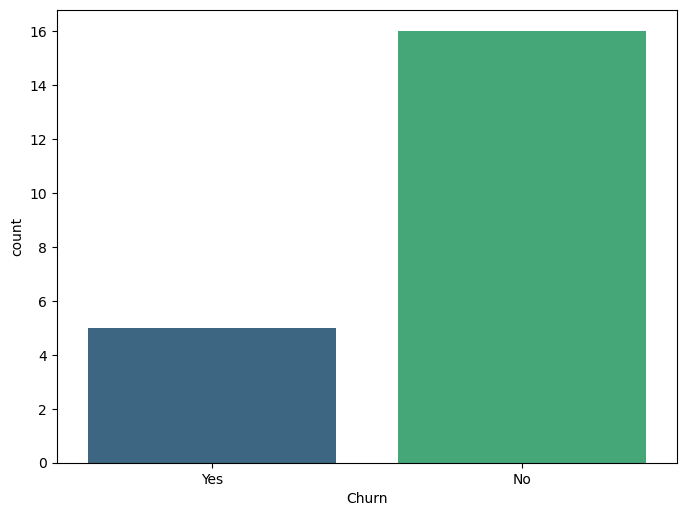

In [102]:
plt.figure(figsize=(8,6),dpi=100)
sb.countplot(data=df,x='Churn',palette='viridis')

In [98]:
g_labels = ['Male', 'Female']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.18, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [97]:
df['Churn'].replace(to_replace=[0,1],value=['No','Yes'],inplace=True)
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

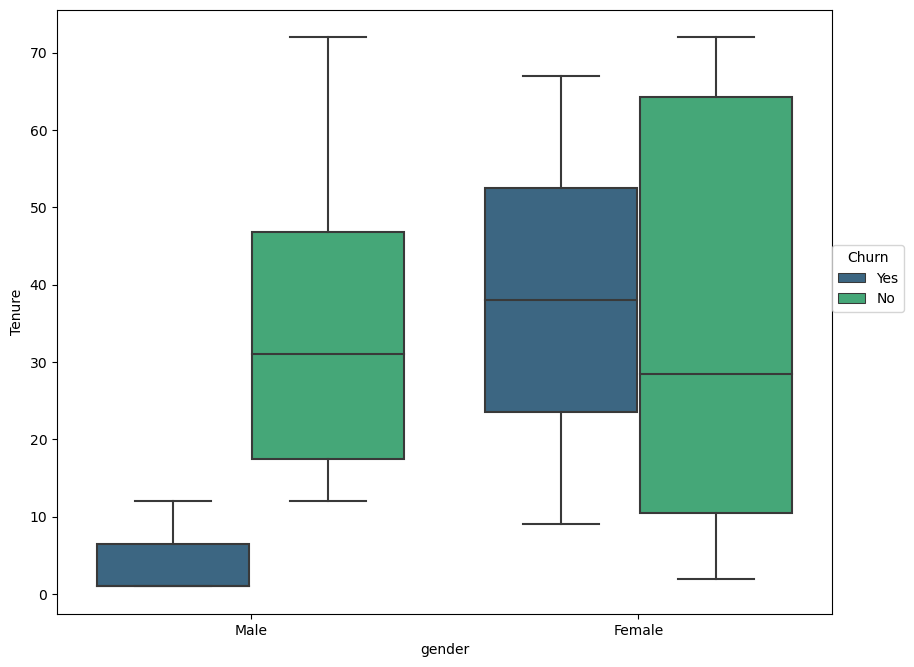

In [106]:
df['gender'].replace(to_replace=[1,0],value=['Male','Female'],inplace=True)
plt.figure(figsize=(10,8),dpi=100)
sb.boxplot(data=df,x='gender',y='Tenure',hue='Churn',palette='viridis')
plt.legend(loc=(1,0.5),title = "Churn")